# Business Understanding

The United States constitution had made mandatory the decennial census.   The census provided a headcount which did not provide enough details to make data driven decisions about the use of government funds.  A long form with necessary details was introduced in the 20th century.   Only one in six households received the additional questions on the long form.  In the 21st century, the American Community Survey (ACS) was established to conduct ongoing surveys with the details previously included on the decennial long form census.   The ACS survey results provide data to determine the appropriate distribution of more than $400 billion in federal and state funds.  The funds are for social programs as well as physical and service infrastructure.  

Annually 3.5 million homes are surveyed.   A random sample was performed on both the housing data as well as the personal data to allow for manageable data sets while including a macro vision of the data.  We will consider the data the training sets.
The validation of the data can be done in several ways.  A statistically sound method would be to validate the data using another random sampling which would be the test set.   Another potential option would be the validate the federal spending.  Due to the difficulty in finding the specifics spending details, the spending validation model would be prohibited by the time constraints as well as data availability constraints. 

Source:  https://www.census.gov/programs-surveys/acs/


# Data Description

The focus of the exploratory data analysis is the personal data.  The personal data contains 283 attributes.  The data dictionary link below provides the description of the attributes.  

Data Dictionary:  https://www2.census.gov/programs-surveys/acs/tech_docs/pums/data_dict/PUMSDataDict13.txt





In [22]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.patches import Polygon, PathPatch
from matplotlib.collections import PatchCollection
from mpl_toolkits.basemap import Basemap

os.chdir('/Users/ed/')

fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111, axisbg='w', frame_on=False)
fig.suptitle('PUMA Shapefiles: An Example with Basemap', fontsize=20)


C:\Users\ed\Anaconda3\lib\site-packages\matplotlib\cbook.py:136: MatplotlibDeprecationWarning: The axisbg attribute was deprecated in version 2.0. Use facecolor instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


In [23]:

# create a map object with the Albert Equal Areas projection.
# This projection tends to look nice for the contiguous us.
m = Basemap(width=5000000,height=3500000,
            resolution='l',projection='aea',\
            lat_1=30.,lat_2=50,lon_0=-96,lat_0=38)
            
# state codes from http://www2.census.gov/programs-surveys/acs/tech_docs/pums/data_dict/PUMSDataDict13.txt
# note that areas outside of the conus have been commented out
state_codes = {
    '01': 'Alabama',
    '02': 'Alaska',
    '04': 'Arizona',
    '05': 'Arkansas',
    '06': 'California',
    '08': 'Colorado',
    '09': 'Connecticut',
    '10': 'Delaware',
    '11': 'District of Columbia',
    '12': 'Florida',
    '13': 'Georgia',
    '15': 'Hawaii',
    '16': 'Idaho',
    '17': 'Illinois',
    '18': 'Indiana',
    '19': 'Iowa',
    '20': 'Kansas',
    '21': 'Kentucky',
    '22': 'Louisiana',
    '23': 'Maine',
    '24': 'Maryland',
    '25': 'Massachusetts',
    '26': 'Michigan',
    '27': 'Minnesota',
    '28': 'Mississippi',
    '29': 'Missouri',
    '30': 'Montana',
    '31': 'Nebraska',
    '32': 'Nevada',
    '33': 'New Hampshire',
    '34': 'New Jersey',
    '35': 'New Mexico',
    '36': 'New York',
    '37': 'North Carolina',
    '38': 'North Dakota',
    '39': 'Ohio',
    '40': 'Oklahoma',
    '41': 'Oregon',
    '42': 'Pennsylvania',
    '44': 'Rhode Island',
    '45': 'South Carolina',
    '46': 'South Dakota',
    '47': 'Tennessee',
    '48': 'Texas',
    '49': 'Utah',
    '50': 'Vermont',
    '51': 'Virginia',
    '53': 'Washington',
    '54': 'West Virginia',
    '55': 'Wisconsin',
    '56': 'Wyoming',
    '72': 'Puerto Rico'
}       



In [24]:
# define a colorramp
num_colors = 10
cm = plt.get_cmap('Blues')
blues = [cm(1.*i/num_colors) for i in range(num_colors)]


In [25]:
# add colorbar legend
cmap = mpl.colors.ListedColormap(blues)
# define the bins
bounds = np.linspace(0.0, 1.0, num_colors)


The original dataset contained approximately 3.1 million records. We quickly found that using the entire dataset would be much too arduous on our computers and would take too much time to gain meaningful information from the data.

Instead of using the massive, original dataset; we decided to take a subset of the dataset. The dataset we created includes 2.5% of the original observations (approximatly 78,000 rows). We recognize that there will be some loss in the interpretability of any statistical observations we make on this subset.  We use groupings of appropriate levels within the features e.i. poverty by state to gain a general sense of the wealth across the contenintal US.

In [26]:
df = pd.read_csv('/data/person/person-subset-2.5percent.csv')

## Poverty

In [27]:
df.POVPIP.describe()

count    75204.000000
mean       304.934019
std        165.949662
min          0.000000
25%        159.000000
50%        307.000000
75%        501.000000
max        501.000000
Name: POVPIP, dtype: float64

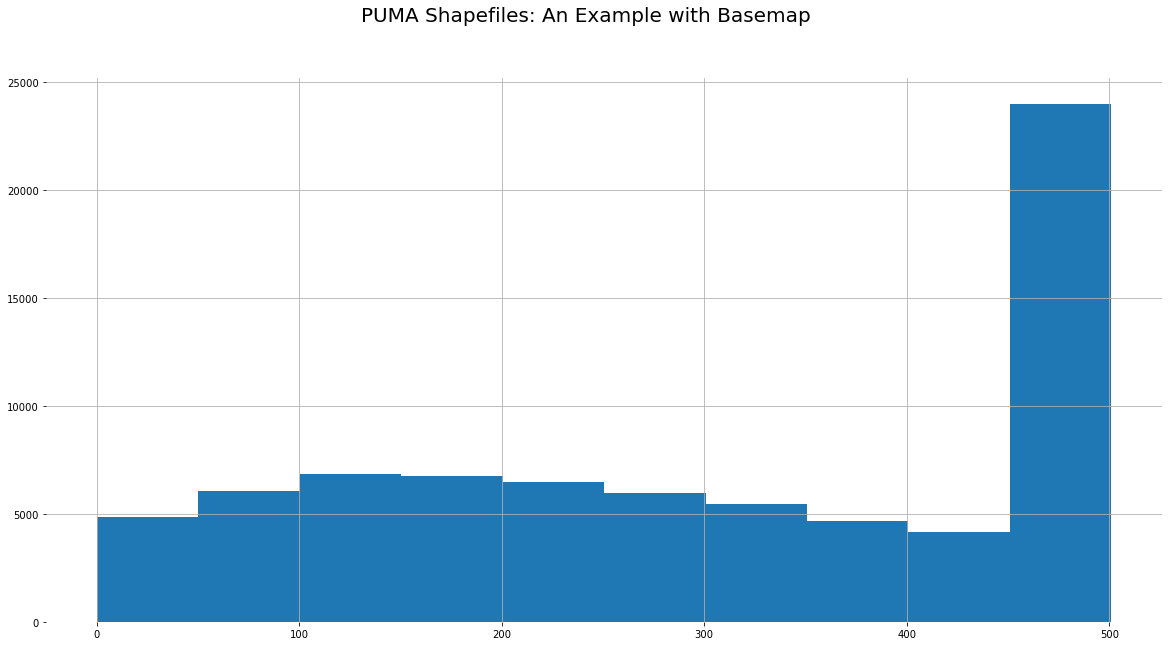

In [ ]:
df.POVPIP.hist()
plt.show()

In [ ]:
#grab PUMA
puma = df.groupby(['PUMA'])
puma.describe()


In [ ]:
puma.PINCP.mean().div(df.PINCP.max())


In [ ]:
i = 100
# read each states shapefile
for key in state_codes.keys():
    m.readshapefile('data/shapefiles/tl_2013_{0}_puma10'.format(key),
                    name='state', drawbounds=True, default_encoding='latin-1')
                    
    # loop through each PUMA and assign a random color from our colorramp
    for info, shape in zip(m.state_info, m.state):
        patches = [Polygon(np.array(shape), True)]
        pc = PatchCollection(patches, edgecolor='k', linewidths=1., zorder=2)
        pc.set_color(blues[df.logPINCP[i]*10])
        ax.add_collection(pc)
        i = i + 1


In [ ]:
# create a second axes for the colorbar
ax2 = fig.add_axes([0.82, 0.1, 0.03, 0.8])
cb = mpl.colorbar.ColorbarBase(ax2, cmap=cmap, ticks=bounds, boundaries=bounds,
                               format='%1i')
cb.ax.set_yticklabels([str(round(i, 2)) for i in bounds])

plt.savefig('/data/gen/person_conus.png')


# Other Data Sources

We use a subset of the kaggle data source that came from the 2013 American Community Survey (ACS).  The ACS website has more information on the weights and replications used. 

We also use a map found from another kaggle site and again supplemented the shape files with the ones available at the ACS website.

The income data was also supplemented with data from another site.